In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import os
import glob
import json 
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
# os.listdir('./Prediction_train&test_Data')
def load_data(url):
    
    folderName = "./Prediction_train&test_Data/"
    fileName = "Store_league_data.json"
    path = os.path.join(folderName, fileName)

#     if os.path.exists(path):
#         files = glob.glob("./Prediction_train&test_Data/*")
#         for f in files:
#             os.remove(f)

    response = requests.get(url)
    # print(path)

    with open(path, 'wb') as outfile:
        outfile.write(response.content)
     

        
url = "https://vsmobile.bet9ja.com/shopadmin/standings_view/league_data.php?pid=14001"
load_data(url)

In [3]:
folderName = "./Prediction_train&test_Data/"
fileName = "Store_league_data.json"


path = os.path.join(folderName, fileName)


with open(path, "r") as outfile:
    json_obj = json.load(outfile)

In [4]:
print(json_obj)

{'teams': {'49': {'fifa': 'EVE', 'team': 'everton'}, '972': {'fifa': 'BRN', 'team': 'brentford'}, '67': {'fifa': 'BOU', 'team': 'bournemouth'}, '47': {'fifa': 'CHE', 'team': 'chelsea'}, '45': {'fifa': 'LIV', 'team': 'liverpool'}, '48': {'fifa': 'ARS', 'team': 'arsenal'}, '512': {'fifa': 'FUL', 'team': 'fulham'}, '525': {'fifa': 'WOL', 'team': 'wolverhampton'}, '52': {'fifa': 'SOU', 'team': 'southampton'}, '53': {'fifa': 'NWC', 'team': 'newcastle'}, '58': {'fifa': 'WHU', 'team': 'west_ham'}, '51': {'fifa': 'TOT', 'team': 'tottenham'}, '50': {'fifa': 'MNU', 'team': 'manchester_united'}, '1053': {'fifa': 'FOR', 'team': 'nottingham_forest'}, '71': {'fifa': 'BRI', 'team': 'brighton'}, '827': {'fifa': 'LEE', 'team': 'leeds_united'}, '46': {'fifa': 'MNC', 'team': 'manchester_city'}, '60': {'fifa': 'ASV', 'team': 'aston_villa'}, '55': {'fifa': 'CRY', 'team': 'crystal_palace'}, '63': {'fifa': 'LEI', 'team': 'leicester_city'}}, 'matches': {'1': {'1512781': {'id': '1512781', 'teamA': '49', 'teamB

In [5]:
json_obj["teams"]

{'49': {'fifa': 'EVE', 'team': 'everton'},
 '972': {'fifa': 'BRN', 'team': 'brentford'},
 '67': {'fifa': 'BOU', 'team': 'bournemouth'},
 '47': {'fifa': 'CHE', 'team': 'chelsea'},
 '45': {'fifa': 'LIV', 'team': 'liverpool'},
 '48': {'fifa': 'ARS', 'team': 'arsenal'},
 '512': {'fifa': 'FUL', 'team': 'fulham'},
 '525': {'fifa': 'WOL', 'team': 'wolverhampton'},
 '52': {'fifa': 'SOU', 'team': 'southampton'},
 '53': {'fifa': 'NWC', 'team': 'newcastle'},
 '58': {'fifa': 'WHU', 'team': 'west_ham'},
 '51': {'fifa': 'TOT', 'team': 'tottenham'},
 '50': {'fifa': 'MNU', 'team': 'manchester_united'},
 '1053': {'fifa': 'FOR', 'team': 'nottingham_forest'},
 '71': {'fifa': 'BRI', 'team': 'brighton'},
 '827': {'fifa': 'LEE', 'team': 'leeds_united'},
 '46': {'fifa': 'MNC', 'team': 'manchester_city'},
 '60': {'fifa': 'ASV', 'team': 'aston_villa'},
 '55': {'fifa': 'CRY', 'team': 'crystal_palace'},
 '63': {'fifa': 'LEI', 'team': 'leicester_city'}}

In [6]:
teams = {"id": [], "name": [], "club": []}

In [7]:
for x, y in json_obj["teams"].items():
    # main_info.id.append(x)
    teams["id"].append(x)
    teams["name"].append(y["fifa"])
    teams["club"].append(y["team"])
   
    
    # print(x)
    # print(y)

In [8]:
teams # if you have ound its index you havefound the club

{'id': ['49',
  '972',
  '67',
  '47',
  '45',
  '48',
  '512',
  '525',
  '52',
  '53',
  '58',
  '51',
  '50',
  '1053',
  '71',
  '827',
  '46',
  '60',
  '55',
  '63'],
 'name': ['EVE',
  'BRN',
  'BOU',
  'CHE',
  'LIV',
  'ARS',
  'FUL',
  'WOL',
  'SOU',
  'NWC',
  'WHU',
  'TOT',
  'MNU',
  'FOR',
  'BRI',
  'LEE',
  'MNC',
  'ASV',
  'CRY',
  'LEI'],
 'club': ['everton',
  'brentford',
  'bournemouth',
  'chelsea',
  'liverpool',
  'arsenal',
  'fulham',
  'wolverhampton',
  'southampton',
  'newcastle',
  'west_ham',
  'tottenham',
  'manchester_united',
  'nottingham_forest',
  'brighton',
  'leeds_united',
  'manchester_city',
  'aston_villa',
  'crystal_palace',
  'leicester_city']}

In [9]:
len(teams['id']) # total number of teams 

20

In [10]:
len(json_obj["weeks"])

24

In [11]:
print(json_obj["weeks"]["1"]["event_data"]), print(len(json_obj["weeks"]["1"]["event_data"]))

49-972-67-47-45-48-512-525-52-53-58-51-50-1053-71-827-46-60-55-63
65


(None, None)

In [12]:
print(json_obj["weeks"]["1"]["teamstats"].split("-"))

['0', '3', '3', '0', '0', '3', '3', '0', '0', '3', '0', '3', '3', '0', '3', '0', '3', '0', '0', '3']


In [13]:
def indetify_club(teams_id):
    idx = teams["id"].index(teams_id)
    return teams["name"][idx]

def get_club_id(team_name):
    club_id = teams["name"].index(team_name)
    return teams["id"][club_id]

In [14]:
indetify_club("50")

'MNU'

In [15]:
json_obj["weeks"]["1"]

{'id': '151279',
 'event_start': '1675812240',
 'event_data': '49-972-67-47-45-48-512-525-52-53-58-51-50-1053-71-827-46-60-55-63',
 'league_id': '3982',
 'matchday': '1',
 'teamstats': '0-3-3-0-0-3-3-0-0-3-0-3-3-0-3-0-3-0-0-3',
 'teamhistory': '0xxxx-3xxxx-3xxxx-0xxxx-0xxxx-3xxxx-3xxxx-0xxxx-0xxxx-3xxxx-0xxxx-3xxxx-3xxxx-0xxxx-3xxxx-0xxxx-3xxxx-0xxxx-0xxxx-3xxxx'}

In [16]:
def query_score(teamA, teamB):
    if teamA > teamB:
        return "win-loss"
    elif teamA < teamB:
        return "loss-win"
    else:
        return "draw-draw"

In [17]:
def get_new_data(data, score, week):
    start = 0
    stop = 1
    add_num = 2
    data = data.split("-")
    score = score.split("-")
    
    # store clubs id and name.
    result = {
        "weeks": [],
        "id":[],
        "club": [],
        "score_string": [],
        "score_num": [],
        "game_type": []
    }
    
    for _ in range(10):
        # slice the event_data from data pass thoure the function parameter
        teamA = data[start]
        teamB = data[stop]

        # identfy the club from thire respected ID
        clubA = indetify_club(teamA)
        clubB = indetify_club(teamB)
		
        # slice the teamstats from score pass thoure the function parameter
        teamA_score = score[start]
        teamB_score = score[stop] 
        
        
        result["weeks"].append(week)
        result["weeks"].append(week)
        
		# appending the data twice to add information
        
        ####### HOME APPENDING #######
        result["id"].append(f"{teamA}")
        
        result["club"].append(f"{clubA}")
        # query scores
        win_loss_drawA = query_score( int(teamA_score), int(teamB_score) ).split("-")[0]
        
        result["score_string"].append( win_loss_drawA )
        # query wins scores
        result["score_num"].append( f" {int(teamA_score)} " )
        
        result["game_type"].append( "home" )
        
        
        
        ####### AWAY APPENDING #######
        result["id"].append(f"{teamB}")
        
        result["club"].append(f"{clubB}")
        
        win_loss_drawB = query_score( int(teamA_score), int(teamB_score) ).split("-")[1]
        
        result["score_string"].append( win_loss_drawB )
        
        result["score_num"].append( f" {int(teamB_score)} " )
        
        result["game_type"].append( "away" )
        
        
        # accumilate the START and STOP for the next sclice
        start += add_num
        stop += add_num

        
        
    return result
 

In [18]:
get_new_data( json_obj["weeks"]["1"]["event_data"], json_obj["weeks"]["1"]["teamstats"],  json_obj["weeks"]["1"]["matchday"])

{'weeks': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1'],
 'id': ['49',
  '972',
  '67',
  '47',
  '45',
  '48',
  '512',
  '525',
  '52',
  '53',
  '58',
  '51',
  '50',
  '1053',
  '71',
  '827',
  '46',
  '60',
  '55',
  '63'],
 'club': ['EVE',
  'BRN',
  'BOU',
  'CHE',
  'LIV',
  'ARS',
  'FUL',
  'WOL',
  'SOU',
  'NWC',
  'WHU',
  'TOT',
  'MNU',
  'FOR',
  'BRI',
  'LEE',
  'MNC',
  'ASV',
  'CRY',
  'LEI'],
 'score_string': ['loss',
  'win',
  'win',
  'loss',
  'loss',
  'win',
  'win',
  'loss',
  'loss',
  'win',
  'loss',
  'win',
  'win',
  'loss',
  'win',
  'loss',
  'win',
  'loss',
  'loss',
  'win'],
 'score_num': [' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 '],
 'game_type': ['home',
  'away',
  'home',
  'away',
  'home',
  'away',
  'home',
  'a

In [19]:
main_second_info = []
for week, events in json_obj["weeks"].items():
    main_second_info.append(get_new_data( events["event_data"], events["teamstats"], events["matchday"]) )
    
   # print(week)

In [20]:
json_obj["weeks"]

{'1': {'id': '151279',
  'event_start': '1675812240',
  'event_data': '49-972-67-47-45-48-512-525-52-53-58-51-50-1053-71-827-46-60-55-63',
  'league_id': '3982',
  'matchday': '1',
  'teamstats': '0-3-3-0-0-3-3-0-0-3-0-3-3-0-3-0-3-0-0-3',
  'teamhistory': '0xxxx-3xxxx-3xxxx-0xxxx-0xxxx-3xxxx-3xxxx-0xxxx-0xxxx-3xxxx-0xxxx-3xxxx-3xxxx-0xxxx-3xxxx-0xxxx-3xxxx-0xxxx-0xxxx-3xxxx'},
 '2': {'id': '151280',
  'event_start': '1675812360',
  'event_data': '972-71-46-45-827-52-60-51-525-49-1053-58-63-67-48-55-47-512-53-50',
  'league_id': '3982',
  'matchday': '2',
  'teamstats': '3-6-4-1-3-0-3-3-1-1-3-0-6-3-4-1-0-6-3-6',
  'teamhistory': '03xxx-33xxx-13xxx-10xxx-30xxx-00xxx-30xxx-03xxx-10xxx-10xxx-30xxx-00xxx-33xxx-03xxx-13xxx-10xxx-00xxx-33xxx-03xxx-33xxx'},
 '3': {'id': '151281',
  'event_start': '1675812480',
  'event_data': '52-972-512-63-58-53-71-525-51-1053-55-46-50-827-67-48-45-60-49-47',
  'league_id': '3982',
  'matchday': '3',
  'teamstats': '3-3-7-7-1-4-7-2-3-6-4-4-7-4-3-7-4-3-4-0',
 

In [21]:
main_second_info[0]

{'weeks': ['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1'],
 'id': ['49',
  '972',
  '67',
  '47',
  '45',
  '48',
  '512',
  '525',
  '52',
  '53',
  '58',
  '51',
  '50',
  '1053',
  '71',
  '827',
  '46',
  '60',
  '55',
  '63'],
 'club': ['EVE',
  'BRN',
  'BOU',
  'CHE',
  'LIV',
  'ARS',
  'FUL',
  'WOL',
  'SOU',
  'NWC',
  'WHU',
  'TOT',
  'MNU',
  'FOR',
  'BRI',
  'LEE',
  'MNC',
  'ASV',
  'CRY',
  'LEI'],
 'score_string': ['loss',
  'win',
  'win',
  'loss',
  'loss',
  'win',
  'win',
  'loss',
  'loss',
  'win',
  'loss',
  'win',
  'win',
  'loss',
  'win',
  'loss',
  'win',
  'loss',
  'loss',
  'win'],
 'score_num': [' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 3 ',
  ' 0 ',
  ' 0 ',
  ' 3 '],
 'game_type': ['home',
  'away',
  'home',
  'away',
  'home',
  'away',
  'home',
  'a

# create database

In [22]:
df_list = []
for data in main_second_info:
    new_data = pd.DataFrame(data)
    df_list.append(new_data)

In [23]:
df = pd.concat(df_list)

In [24]:
df.head()

,weeks,id,club,score_string,score_num,game_type
0,1,49,EVE,loss,0,home
1,1,972,BRN,win,3,away
2,1,67,BOU,win,3,home
3,1,47,CHE,loss,0,away
4,1,45,LIV,loss,0,home


### Wrangling Data

In [25]:
df.head()

,weeks,id,club,score_string,score_num,game_type
0,1,49,EVE,loss,0,home
1,1,972,BRN,win,3,away
2,1,67,BOU,win,3,home
3,1,47,CHE,loss,0,away
4,1,45,LIV,loss,0,home


In [26]:
# df["weeks"].apply(lambda x: int(x))

### ANALYING DATA

<AxesSubplot:xlabel='score_string', ylabel='weeks'>

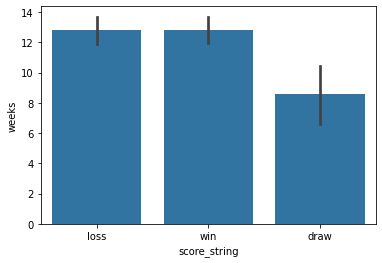

In [27]:
color_paletter = sb.color_palette()[0]
sb.barplot(x = df["score_string"], y = df["weeks"].apply(lambda x: int(x)) , color=color_paletter)

In [28]:
# df.groupby("club").mean()
df.head()

,weeks,id,club,score_string,score_num,game_type
0,1,49,EVE,loss,0,home
1,1,972,BRN,win,3,away
2,1,67,BOU,win,3,home
3,1,47,CHE,loss,0,away
4,1,45,LIV,loss,0,home


In [29]:
# sb.barplot(x = df["club"], y = df["score_string"] , color=color_paletter)
all_tems = df[["club", "score_string"]].value_counts()
# df.query("club == 'MNU'")
club = all_tems.index
club_values = all_tems.values
# plt.figure(figsize=[10, 6])
main_club = [x[0] for x in club]
main_scores = [x[1] for x in club]
print(f"main_club: {main_club[0]}, --- main_scores: {main_scores[0]}, ---, club_values: {club_values[0]}")

main_club: ARS, --- main_scores: win, ---, club_values: 21


In [30]:
query_df_club = pd.DataFrame({
    "clubs": main_club,
    "scores": main_scores,
    "occ": club_values
})

In [31]:
query_df_club

,clubs,scores,occ
0,ARS,win,21
1,SOU,loss,21
2,LEI,win,21
3,EVE,loss,20
4,LIV,win,20
5,MNU,win,19
6,NWC,loss,18
7,BOU,loss,18
8,LEE,loss,17
9,TOT,win,17


<AxesSubplot:xlabel='clubs', ylabel='occ'>

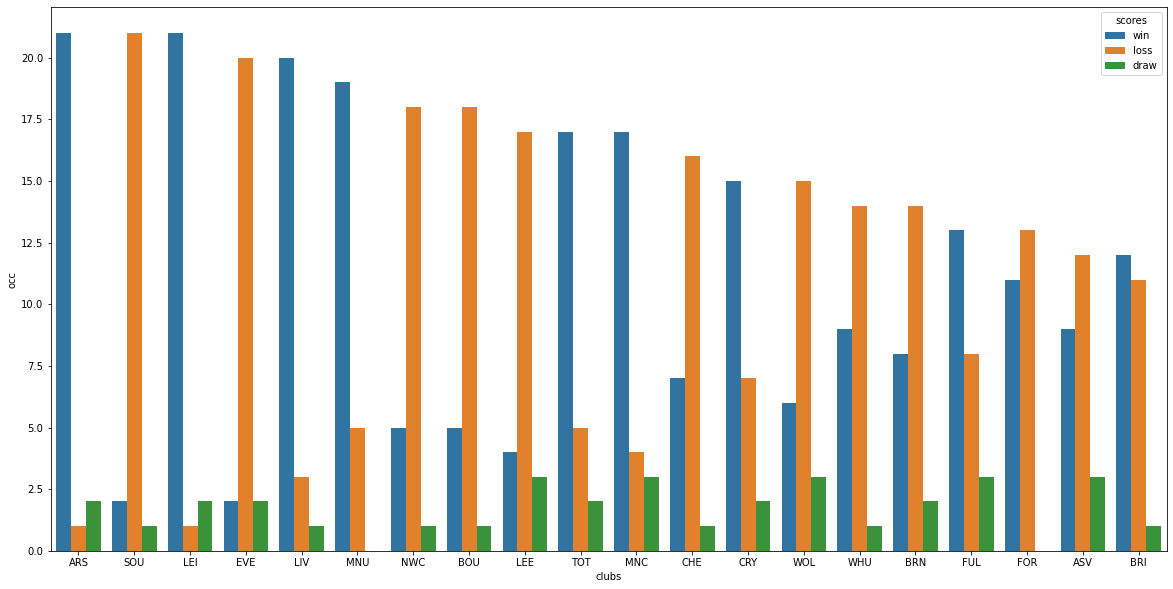

In [32]:
plt.figure(figsize=[20, 10])
sb.barplot(data=query_df_club, x="clubs", y="occ", hue="scores")

In [33]:
query_df_club_wins = query_df_club.query("scores == 'win'")
query_df_club_loss = query_df_club.query("scores == 'loss'")
query_df_club_draw = query_df_club.query("scores == 'draw'")
query_df_club_draw.head()

,clubs,scores,occ
35,WOL,draw,3
36,MNC,draw,3
37,LEE,draw,3
39,ASV,draw,3
40,FUL,draw,3


<AxesSubplot:title={'center':' WINS '}, xlabel='clubs', ylabel='occ'>

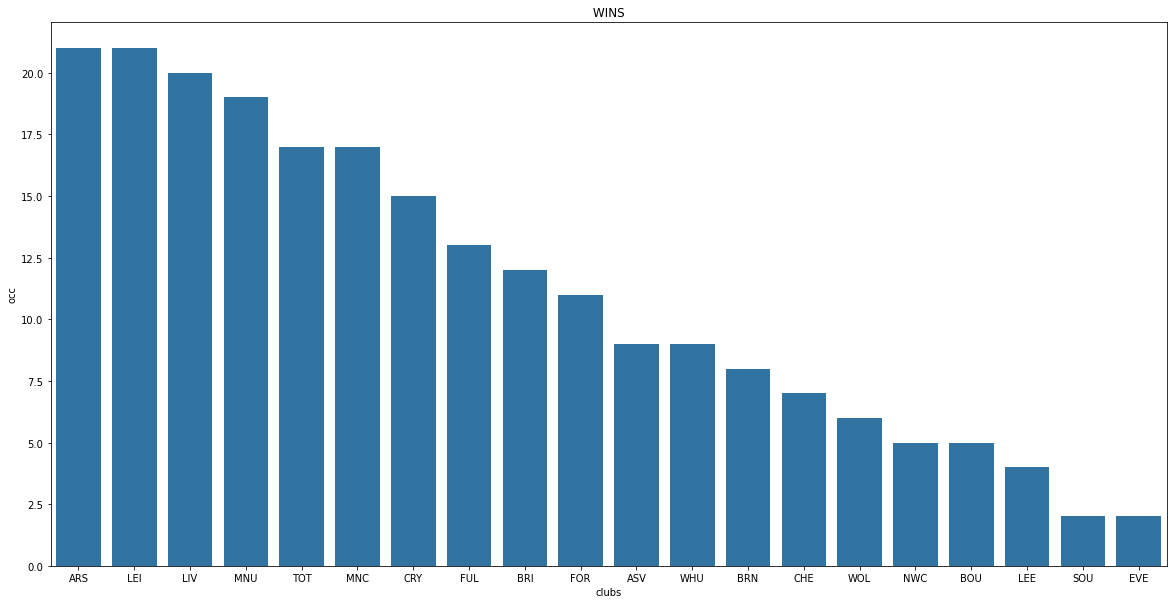

In [34]:
plt.figure(figsize=[20, 10])
plt.title(" WINS ")
sb.barplot(data=query_df_club_wins, x="clubs", y="occ", color=color_paletter)

<AxesSubplot:title={'center':' LOSS '}, xlabel='clubs', ylabel='occ'>

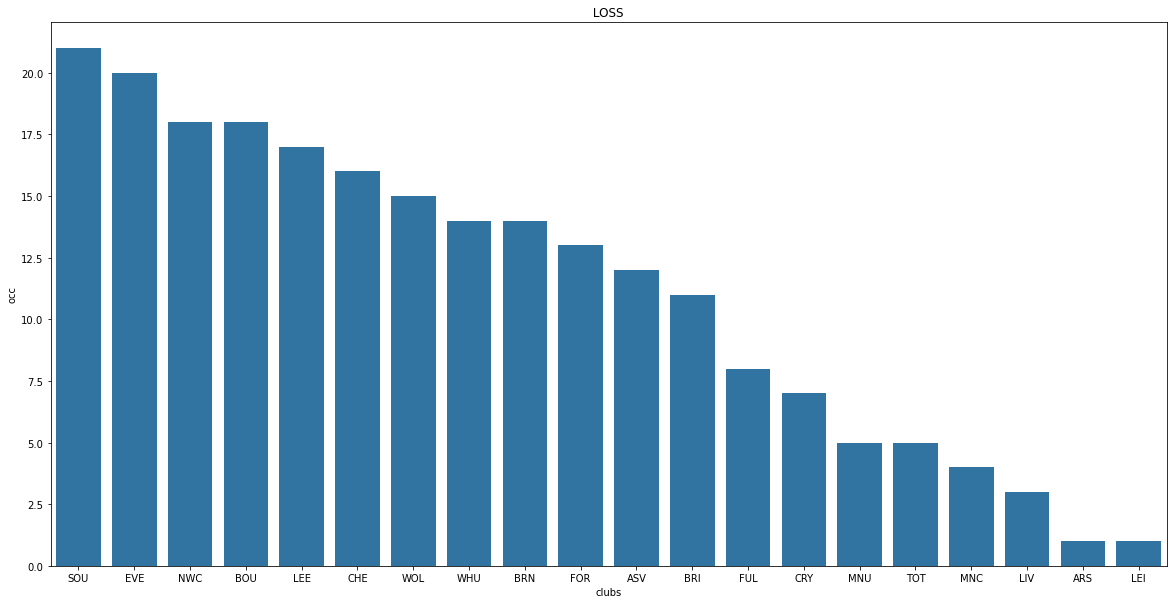

In [35]:
plt.figure(figsize=[20, 10])
plt.title(" LOSS ")
sb.barplot(data=query_df_club_loss, x="clubs", y="occ", color=color_paletter)

In [36]:
df.head()

,weeks,id,club,score_string,score_num,game_type
0,1,49,EVE,loss,0,home
1,1,972,BRN,win,3,away
2,1,67,BOU,win,3,home
3,1,47,CHE,loss,0,away
4,1,45,LIV,loss,0,home


<AxesSubplot:title={'center':' DRAWS '}, xlabel='clubs', ylabel='occ'>

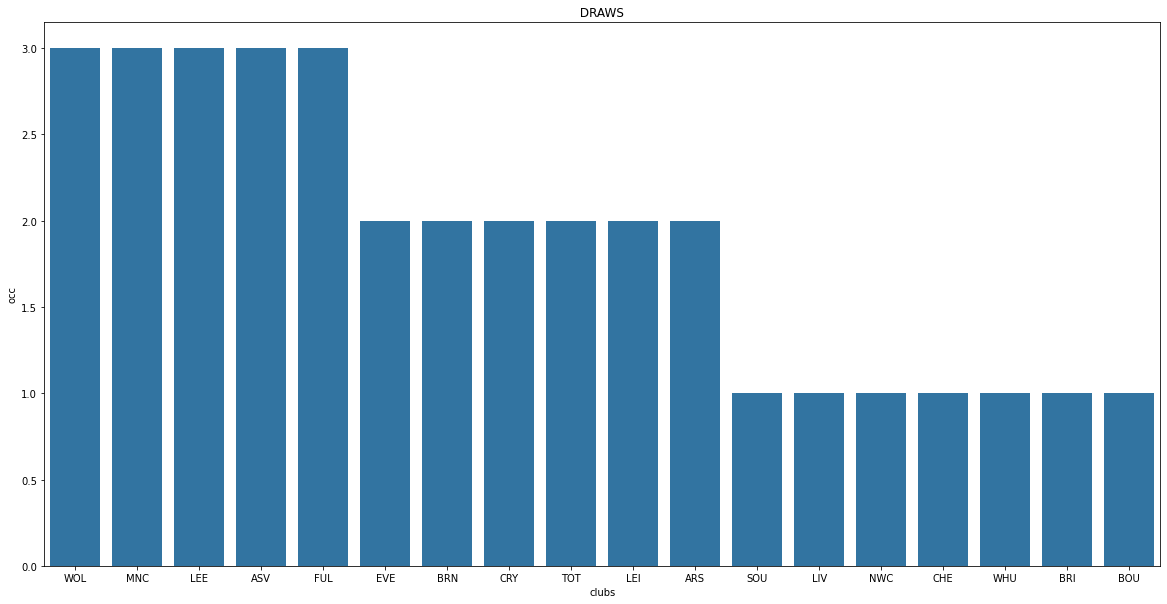

In [37]:
plt.figure(figsize=[20, 10])
plt.title(" DRAWS ")
sb.barplot(data=query_df_club_draw, x="clubs", y="occ", color=color_paletter)

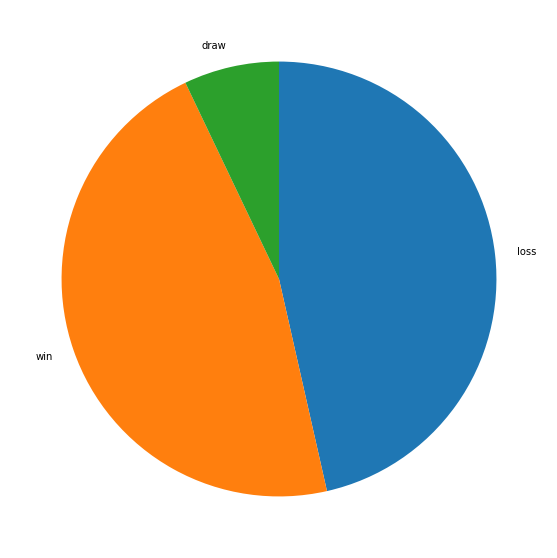

In [38]:
sort_count = df.score_string.value_counts()

plt.figure(figsize=[20, 10])

plt.pie([np.float64(x) for x in sort_count.values], labels=sort_count.index, startangle=90, counterclock=False);


### Select training data

In [39]:
df.head()

,weeks,id,club,score_string,score_num,game_type
0,1,49,EVE,loss,0,home
1,1,972,BRN,win,3,away
2,1,67,BOU,win,3,home
3,1,47,CHE,loss,0,away
4,1,45,LIV,loss,0,home


In [40]:
train_df = df[["id", "score_string"]]
# train_df = df[["club", "final"]]

In [41]:
train_df = train_df.reset_index()
train_df = train_df.drop('index', axis = 1) 
train_df.head()

,id,score_string
0,49,loss
1,972,win
2,67,win
3,47,loss
4,45,loss


In [42]:
len(train_df)

480

#### Train the model

In [43]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#### SPLIT DATA FOR EVEN FEATURES

In [44]:
# train_df[["home", "away"]][:20]["home"].value_counts()
prec_20 = int((20/100)*len(train_df))
prec_20

96

In [45]:
# train_df[["home", "away"]][:20]["away"].value_counts()

In [46]:
train_data = train_df[prec_20:]
test_data = train_df[:prec_20]

In [47]:
train_data.head()

,id,score_string
96,51,win
97,827,loss
98,55,win
99,60,loss
100,45,win


### Ordinary Split

In [48]:
x_train_data = train_data[["id"]]
# x_train_data_dummy = pd.get_dummies(x_train_data)
y_train_data = train_data["score_string"]

In [49]:
x_test_data = test_data[["id"]]
# x_test_data_dummy = pd.get_dummies(x_test_data)
y_test_data = test_data["score_string"]

### cross validation spilt

In [50]:
x_train, x_test, y_train, y_test = train_test_split(train_df[["id"]], train_df["score_string"], test_size=0.3)
# x_train, x_test, y_train, y_test = train_test_split(train_df["club"], train_df["final"], test_size=0.3)

### Stratified Shuffle Split

In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(train_df[["id"]], train_df["score_string"]):
    strat_train_set = train_df.loc[train_index]
    strat_test_set = train_df.loc[test_index]    

In [52]:
y_train.head()

79      win
365    loss
56      win
455    loss
127     win
Name: score_string, dtype: object

In [53]:
x_train.head()

,id
79,71
365,67
56,45
455,53
127,55


In [54]:
strat_train_set.head()

,id,score_string
259,48,win
101,512,loss
100,45,win
387,58,loss
108,46,win


In [55]:
strat_test_set.head()

,id,score_string
66,48,draw
30,1053,win
165,63,win
106,55,win
72,972,loss


### StratifiedShuffleSplit train

In [56]:
y_strat_train_set = strat_train_set["score_string"]
x_strat_train_set = strat_train_set[["id"]]
# x_strat_train_set = strat_train_set["club"]

In [57]:
len(y_strat_train_set), len(x_strat_train_set)

(384, 384)

### StratifiedShuffleSplit test

In [58]:
y_strat_test_set = strat_test_set["score_string"]
x_strat_test_set = strat_test_set[["id"]]
# x_strat_test_set = strat_test_set["club"]

In [59]:
len(y_strat_train_set), len(x_strat_train_set)

(384, 384)

In [60]:
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

### Selecting and Training model

##### Decision tree classifer

In [61]:
model = DecisionTreeClassifier()
model.fit(x_strat_train_set, y_train_data)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

DecisionTreeClassifier()

In [62]:
predictions = model.predict(x_strat_test_set)


In [63]:
# len(predictions) #, len(y_strat_test_set), len(x_strat_test_dummy)
# y_strat_test_set

In [64]:
accuracy = accuracy_score(y_strat_test_set, predictions)

In [65]:
print(f"accuracy: {accuracy}")

accuracy: 0.4583333333333333


##### SGDClassifier

In [66]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_strat_train_set, y_train_data)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

SGDClassifier(random_state=42)

In [67]:
sgd_predict = sgd_clf.predict(x_strat_test_set)
sgd_accuracy = accuracy_score(y_strat_test_set, sgd_predict)

In [68]:
print(f"accuracy: {sgd_accuracy}")

accuracy: 0.46875


##### RandomForestClassifier & cross_validation

In [69]:
forest_clf = RandomForestClassifier(random_state=42)

In [70]:
from sklearn.model_selection import cross_val_score
main_data = cross_val_score(sgd_clf, x_strat_train_set, y_strat_train_set, cv=7, scoring="accuracy")
print(main_data)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

[0.45454545 0.50909091 0.45454545 0.45454545 0.45454545 0.2
 0.48148148]


In [71]:
main_data_forst_clf = cross_val_score(forest_clf, x_strat_train_set, y_strat_train_set, cv=7, scoring="accuracy")
# x_train_data_dummy, y_train_data, x_test_data_dummy, y_test_data
main_data_forst_clf

array([0.72727273, 0.69090909, 0.69090909, 0.58181818, 0.74545455,
       0.70909091, 0.62962963])

In [72]:
main_data.mean(), main_data_forst_clf.mean()

(0.4298220298220298, 0.6821548821548823)

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], 
     # "max_features": [0, 0, 0]
    },
    {"bootstrap": [False], "n_estimators": [3, 10], 
     # "max_features": [2, 3, 4]
    }
]
grid_search = GridSearchCV(forest_clf, param_grid, cv=7, scoring="accuracy")

In [74]:
grid_search.fit(x_strat_train_set, y_strat_train_set)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'n_estimators': [3, 10]}],
             scoring='accuracy')

In [75]:
grid_search.best_params_

{'n_estimators': 10}

In [76]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(n_estimators=10, random_state=42)

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8196128792090029 {'n_estimators': 3}
0.830630537571964 {'n_estimators': 10}
0.830630537571964 {'n_estimators': 30}
0.8275266671234135 {'bootstrap': False, 'n_estimators': 3}
0.8275266671234135 {'bootstrap': False, 'n_estimators': 10}


### FINAL PREDICTION!!!🎉👏🏽🎊

In [78]:
# x_train_data_dummy, y_train_data, x_test_data_dummy, y_test_data
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

final_predctions = final_model.predict(x_strat_test_set)
final_accuracy_score = accuracy_score(y_strat_test_set, final_predctions)
print(f"accuracy: {final_accuracy_score}")

accuracy: 0.6041666666666666


In [79]:
id_cubs = np.array([get_club_id(x) for x in df.club.value_counts().index]).reshape(-1, 1)
cubs = df.club.value_counts().index
predictions = final_model.predict(id_cubs)

In [80]:
# [get_club_id(x) for x in df.club.value_counts().index]

In [81]:
prediction_df = pd.DataFrame({
    "id_clubs": [get_club_id(x) for x in df.club.value_counts().index],
    "clubs": cubs,
    "predictions": predictions
})
prediction_df.sort_values(by=["clubs"])

,id_clubs,clubs,predictions
11,48,ARS,win
12,60,ASV,loss
15,67,BOU,loss
10,71,BRI,win
18,972,BRN,loss
6,47,CHE,loss
17,55,CRY,win
13,49,EVE,loss
7,1053,FOR,loss
2,512,FUL,win


In [82]:
len(df)/20

24.0

In [83]:
# indetify_club
# new_df = pd.DataFrame({"home": [indetify_club("MNC"), indetify_club("LEI"), indetify_club("LIV"), indetify_club("NWC")], 
  #                     "away": [indetify_club("BRI"), indetify_club("CHE"), indetify_club("TOT"), indetify_club("FOR")]})

### PRE PER PREDICTIONS.

In [84]:
# d4 = BeautifulSoup
url = "https://bam.nr-data.net/jserrors/1/c95cd51526?a=214311961&v=1223.PROD&to=ZlBXZxcAVkEHV0NbDV8aYEEMTlpXEg1dU09cWldaCQQXXglTXlxNWFtRVh1PSFoW&rst=476457&ck=0&s=0&ref=https://vsmobile.bet9ja.com/bet9ja-mobile/login/"
html = requests.get(url)
print(html.text)

s = BeautifulSoup(html.content, "html.parser")
# requests

GIF89a     ,       


In [85]:
url = https://vsmobile.bet9ja.com" + uri + (containsChar('?', uri) ? "&mode=" : "?mode=") + mode + "&lang=" + lang;
    
url = "https://vsmobile.bet9ja.com/mobile/themes/?sk=bet9ja&t=b61c29e6-9348-4c58-af90-378760a74693&game=league_premier&pid=14001,14003,14011,14012,14014,14015,14016,14017&v=0&mode=Premier&lang=en_GB";
url = "https://vsmobile.bet9ja.com/shopadmin/standings_view/league_data.php?pid=14003"

SyntaxError: invalid syntax (<ipython-input-85-5e331335d67e>, line 1)

In [ ]:
new_df = pd.DataFrame({"home": ["for"], "away": ["che"]})
new_df

In [ ]:
pd.get_dummies(new_df)

In [ ]:
# sgd_clf.predict(pd.get_dummies(new_df))